<a href="https://colab.research.google.com/github/muksmuks/computer_vision/blob/master/project_9/Week_09_W6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras import regularizers
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D,AveragePooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
import cv2

In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_rows, img_cols,img_channels =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

In [34]:
print (num_classes)
print (num_train)
print (train_features.shape)

10
50000
(50000, 32, 32, 3)


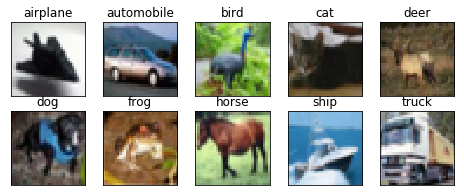

In [35]:
##Knowing the data always helps. Seeing an image for each class

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))

for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    
    ##take the first image of each class
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx[0],::]
    ax.set_title(class_names[i])
    plt.imshow(features_idx)
plt.show()

In [0]:
train_features = train_features.astype('uint8')
test_features = test_features.astype('uint8')

train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

##Model Definition

In [0]:
def custom_model():
  # Define the model
  model = Sequential()
  model.add(Convolution2D(32, 3, 3, border_mode='same',kernel_regularizer=regularizers.l2(0.0001), input_shape=(32, 32, 3)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())

  model.add(Convolution2D(64, 3, 3,kernel_regularizer=regularizers.l2(0.0001),border_mode='same'))
  model.add(Activation('relu'))
  model.add(BatchNormalization())

  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.2))

  model.add(Convolution2D(32, 1, 1))


  model.add(Convolution2D(64, 3, 3,kernel_regularizer=regularizers.l2(0.0001),border_mode='same'))
  model.add(Activation('relu'))
  model.add(BatchNormalization())

  model.add(Convolution2D(128, 3, 3,kernel_regularizer=regularizers.l2(0.0001),border_mode='same'))
  model.add(Activation('relu'))
  model.add(BatchNormalization())

  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.3))

  model.add(Convolution2D(32, 1, 1))


  model.add(Convolution2D(128, 3, 3,kernel_regularizer=regularizers.l2(0.0001), border_mode='same'))
  model.add(Activation('relu'))
  model.add(BatchNormalization())

  model.add(Convolution2D(256, 3, 3,kernel_regularizer=regularizers.l2(0.0001), border_mode='same'))
  model.add(Activation('relu'))
  model.add(BatchNormalization())

  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.5))

  model.add(Convolution2D(10, 1, 1))

  model.add(AveragePooling2D(pool_size = (4,4)))
  model.add(Flatten())


  model.add(Activation('softmax'))

  # Compile the model
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model


In [38]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)

model = custom_model()

model.summary()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), kernel_regularizer=<keras.reg..., input_shape=(32, 32, 3..., padding="same")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), kernel_regularizer=<keras.reg..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (1, 1))`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), kernel_regularizer=<keras.reg..., padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), kernel_regulariz

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_15 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
activation_16 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_14 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 64)        0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1))`


#Assignment Part 1

##Train the model for 100 epochs

In [39]:
# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# compute test accuracy
#print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=100)`
  """


Epoch 1/100
390/390 [==============================] - 33s 84ms/step - loss: 1.4152 - acc: 0.5107 - val_loss: 1.3461 - val_acc: 0.5796
Epoch 2/100
390/390 [==============================] - 30s 77ms/step - loss: 0.9977 - acc: 0.6632 - val_loss: 1.1798 - val_acc: 0.5957
Epoch 3/100
390/390 [==============================] - 30s 77ms/step - loss: 0.8195 - acc: 0.7313 - val_loss: 0.7946 - val_acc: 0.7461
Epoch 4/100
390/390 [==============================] - 30s 76ms/step - loss: 0.7232 - acc: 0.7671 - val_loss: 0.7473 - val_acc: 0.7659
Epoch 5/100
390/390 [==============================] - 30s 77ms/step - loss: 0.6593 - acc: 0.7942 - val_loss: 0.7362 - val_acc: 0.7706
Epoch 6/100
390/390 [==============================] - 30s 77ms/step - loss: 0.6068 - acc: 0.8139 - val_loss: 0.7129 - val_acc: 0.7858
Epoch 7/100
390/390 [==============================] - 30s 77ms/step - loss: 0.5805 - acc: 0.8260 - val_loss: 0.7534 - val_acc: 0.7763
Epoch 8/100
390/390 [==============================] - 

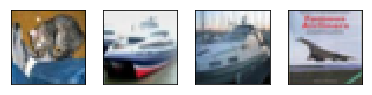

In [40]:
##Predict a class. We go with the first 4 images in the test dataset
##Let's see the images
fig = plt.figure(figsize=(8,3))

for i in [0,1,2,3]:
    ax = fig.add_subplot(2, 5, 1+i, xticks=[], yticks=[])
    features_idx = test_features[i,::]
    plt.imshow(features_idx)
plt.show()

In [59]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

#Create a batch containing 4 images
test_image = test_features[0:4]

print(test_image.dtype)

predict = model.predict(test_image)

print(predict[0])

for i in range(predict.shape[0]):
  class_predicted = class_names[np.argmax(predict[i])]
  print('The predicted class is -->',class_predicted)

float32
[0.23308976 0.01768256 0.03033793 0.08942621 0.12383667 0.0011982
 0.06073187 0.00075057 0.43935618 0.00359005]
The predicted class is --> ship
The predicted class is --> ship
The predicted class is --> ship
The predicted class is --> ship


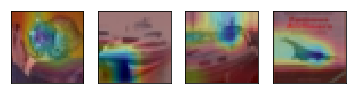

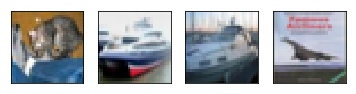

In [43]:
from keras import backend as K
import matplotlib.pyplot as plt

last_conv_layer = model.get_layer("conv2d_27")

fig = plt.figure()

for i in range(predict.shape[0]):
  
  #So we get the predictions for the image and 
  #then we take the topmost class index. Then, we take the output from the 
  #final convolutional layer in the model which is conv2d_27. 
  #The resulting feature map will be of shape 4x4x10
  class_idx = np.argmax(predict[i])
  class_output = model.output[:, class_idx]
  
  
  #we compute the gradient of the class output value with respect to the feature map. 
  #Then, we pool the gradients over all the axes leaving out the channel dimension. 
  #Finally, we weigh the output feature map with the computed gradient values.
  grads = K.gradients(class_output, last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
  test_image_batch = np.expand_dims(test_image[i], axis=0)
  pooled_grads_value, conv_layer_output_value = iterate([test_image_batch])
  for k in range(10):
    conv_layer_output_value[:, :, k] *= pooled_grads_value[k]
  
  
  #We then average the weighed feature map along the channel dimension 
  #resulting in a heat map of size 4*4. 
  #And, then we normalize the heat map to make the values in between 0 and 1.
  heatmap = np.mean(conv_layer_output_value, axis = -1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)
  
  heatmap = cv2.resize(heatmap, (test_image[i].shape[1], test_image[i].shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)


 
  test_image = test_image.astype('uint8')
  superimposed_img = cv2.addWeighted(test_image[i], 0.5, heatmap, 0.3, 0)
  
  ax = fig.add_subplot(1, 4, 1 + i, xticks=[], yticks=[])
  plt.imshow(superimposed_img)


  
  
fig = plt.figure()

for i in [0,1,2,3]:
    ax = fig.add_subplot(1, 4, 1+i, xticks=[], yticks=[])
    features_idx = test_features[i,::]
    plt.imshow(features_idx)

plt.show()


#Assignment Part 2

##Cutout Parameters


###Parameters are fully configurable as:

**get_random_eraser**(p=0.5, s_l=0.02, s_h=0.4, r_1=0.3, r_2=1/0.3,
                                   v_l=0, v_h=255, pixel_level=False)

p : the probability that random erasing is performed

s_l, s_h : minimum / maximum proportion of erased area against input image

r_1, r_2 : minimum / maximum aspect ratio of erased area

v_l, v_h : minimum / maximum value for erased area

pixel_level : pixel-level randomization for erased area

###Creating a new ImageGenerator with 
Cutout Added (v_l=0,v_h=255, s_l=0.02, s_h=0.2)

###Define the get_random_eraser function as provided by 
#####https://github.com/yu4u/cutout-random-erasing/blob/master/random_eraser.py

In [0]:
def get_random_eraser(p=0.5, s_l=0.02, s_h=0.4, r_1=0.3, r_2=1/0.3, v_l=0, v_h=255, pixel_level=False):
    def eraser(input_img):
        img_h, img_w, img_c = input_img.shape
        p_1 = np.random.rand()

        if p_1 > p:
            return input_img

        while True:
            s = np.random.uniform(s_l, s_h) * img_h * img_w
            r = np.random.uniform(r_1, r_2)
            w = int(np.sqrt(s / r))
            h = int(np.sqrt(s * r))
            left = np.random.randint(0, img_w)
            top = np.random.randint(0, img_h)

            if left + w <= img_w and top + h <= img_h:
                break

        if pixel_level:
            c = np.random.uniform(v_l, v_h, (h, w, img_c))
        else:
            c = np.random.uniform(v_l, v_h)

        input_img[top:top + h, left:left + w, :] = c

        return input_img

    return eraser

In [45]:
from keras.preprocessing.image import ImageDataGenerator

model1 = custom_model()
model1.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), kernel_regularizer=<keras.reg..., input_shape=(32, 32, 3..., padding="same")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), kernel_regularizer=<keras.reg..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (1, 1))`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), kernel_regularizer=<keras.reg..., padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), kernel_regulariz

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_22 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_19 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
activation_23 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_20 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 16, 16, 64)        0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1))`


In [0]:
datagen1 = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False,
                            preprocessing_function=get_random_eraser(v_l=0, v_h=255, s_l=0.02, s_h=0.2))

In [47]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_rows, img_cols,img_channels =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

train_features = train_features.astype('float32')
test_features = test_features.astype('float32')

train_features = train_features/255
test_features = test_features/255

train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)


##Check few of the images(10) to validate that cutout occurs

# demonstrate effect on a single batch of samples
iterator = datagen1.flow(train_features, train_labels, batch_size=10)

# get a batch
x_batch, y_batch = iterator.next()


print(x_batch.shape)

(10, 32, 32, 3)


####Verify that cutout is occurring

W0813 15:18:37.161444 140654208509824 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0813 15:18:37.227545 140654208509824 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0813 15:18:37.246318 140654208509824 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0813 15:18:37.266827 140654208509824 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0813 15:18:37.285976 140654208509824 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0813 15:18:37.305634 140654208509824 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


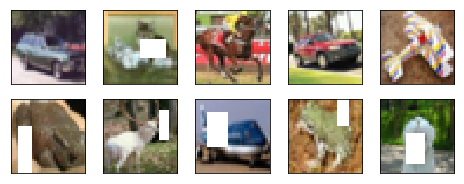

In [48]:
fig = plt.figure(figsize=(8,3))
for i in range(x_batch.shape[0]):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    plt.imshow(x_batch[i])
plt.show()

In [49]:
# train the model
start = time.time()
# Train the model
model_info = model1.fit_generator(datagen1.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)

end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=100)`
  """


Epoch 1/100
390/390 [==============================] - 34s 86ms/step - loss: 1.9828 - acc: 0.2928 - val_loss: 1.8091 - val_acc: 0.3569
Epoch 2/100
390/390 [==============================] - 30s 78ms/step - loss: 1.5591 - acc: 0.4500 - val_loss: 3.7182 - val_acc: 0.1189
Epoch 3/100
390/390 [==============================] - 30s 77ms/step - loss: 1.3359 - acc: 0.5367 - val_loss: 5.0186 - val_acc: 0.1731
Epoch 4/100
390/390 [==============================] - 30s 78ms/step - loss: 1.1846 - acc: 0.5966 - val_loss: 2.8534 - val_acc: 0.3214
Epoch 5/100
390/390 [==============================] - 30s 78ms/step - loss: 1.0631 - acc: 0.6482 - val_loss: 2.7451 - val_acc: 0.2672
Epoch 6/100
390/390 [==============================] - 30s 78ms/step - loss: 0.9760 - acc: 0.6822 - val_loss: 1.5458 - val_acc: 0.5011
Epoch 7/100
390/390 [==============================] - 31s 78ms/step - loss: 0.9219 - acc: 0.7042 - val_loss: 1.7266 - val_acc: 0.4868
Epoch 8/100
390/390 [==============================] - 

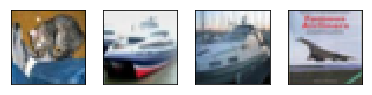

In [50]:

##Predict a class. We go with the first 4 images in the test dataset
##Let's see the images
fig = plt.figure(figsize=(8,3))

for i in [0,1,2,3]:
    ax = fig.add_subplot(2, 5, 1+i, xticks=[], yticks=[])
    features_idx = test_features[i,::]
    plt.imshow(features_idx)
plt.show()

In [65]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

#Create a batch containing 4 images
test_image = test_features[0:4]
predict = model1.predict(test_image)

test_image = test_image*255

for i in range(predict.shape[0]):
  class_predicted1 = class_names[np.argmax(predict[i])]
  print('The predicted class is -->',class_predicted1)

The predicted class is --> cat
The predicted class is --> ship
The predicted class is --> ship
The predicted class is --> airplane


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in true_divide


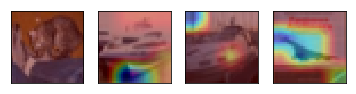

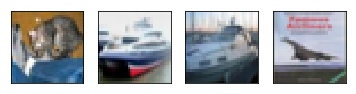

In [67]:
from keras import backend as K
import matplotlib.pyplot as plt

last_conv_layer = model1.get_layer("conv2d_36")

fig = plt.figure()

for i in range(predict.shape[0]):
  
  #So we get the predictions for the image and 
  #then we take the topmost class index. Then, we take the output from the 
  #final convolutional layer in the model which is conv2d_36. 
  #The resulting feature map will be of shape 4x4x10
  class_idx = np.argmax(predict[i])
  class_output = model1.output[:, class_idx]
  
  
  #we compute the gradient of the class output value with respect to the feature map. 
  #Then, we pool the gradients over all the axes leaving out the channel dimension. 
  #Finally, we weigh the output feature map with the computed gradient values.
  grads = K.gradients(class_output, last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  iterate = K.function([model1.input], [pooled_grads, last_conv_layer.output[0]])
  test_image_batch = np.expand_dims(test_image[i], axis=0)
  pooled_grads_value, conv_layer_output_value = iterate([test_image_batch])
  for k in range(10):
    conv_layer_output_value[:, :, k] *= pooled_grads_value[k]
  
  
  #We then average the weighed feature map along the channel dimension 
  #resulting in a heat map of size 4*4. 
  #And, then we normalize the heat map to make the values in between 0 and 1.
  heatmap = np.mean(conv_layer_output_value, axis = -1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)
  
  heatmap = cv2.resize(heatmap, (test_image[i].shape[1], test_image[i].shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)


 
  test_image = test_image.astype('uint8')
  superimposed_img = cv2.addWeighted(test_image[i], 0.5, heatmap, 0.4, 0)
  
  ax = fig.add_subplot(1, 4, 1 + i, xticks=[], yticks=[])
  plt.imshow(superimposed_img)


  
  
fig = plt.figure()

for i in [0,1,2,3]:
    ax = fig.add_subplot(1, 4, 1+i, xticks=[], yticks=[])
    features_idx = test_image[i,::]
    plt.imshow(features_idx)

plt.show()
